# Feature Selection

Представлен датасет центра приюта животных, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).

Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.
7. Не забывайте, что у вас есть PCA (Метод главных компонент). Он может пригодиться.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

---

## Загрузка данных

In [2]:
data = pd.read_csv('aac_shelter_outcomes.csv')
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [3]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)

In [4]:
# **При запуске ProfileReport у меня выдает ошибку (приведена ниже). Как побороть - не знаю.**

# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-3-4f326df48213> in <module>
#       1 import pandas_profiling
# ----> 2 pandas_profiling.ProfileReport(data)

# ~\anaconda3\lib\site-packages\pandas_profiling\__init__.py in __init__(self, df, **kwargs)
#      64         sample = kwargs.get('sample', df.head())
#      65 
# ---> 66         description_set = describe(df, **kwargs)
#      67 
#      68         self.html = to_html(sample,

# ~\anaconda3\lib\site-packages\pandas_profiling\describe.py in describe(df, bins, check_correlation, correlation_threshold, correlation_overrides, check_recoded, pool_size, **kwargs)
#     390             if name not in names:
#     391                 names.append(name)
# --> 392     variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
#     393     variable_stats.columns.names = df.columns.names
#     394 

# TypeError: concat() got an unexpected keyword argument 'join_axes'

---

## Задача: 
"по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”)"

## Аномалии:
- все типы данных строковые

## Предообработка (to do):
1. В соответствии с задачей в столбце outcome_type оставить только целевые значения (Adoption, Transfer), остальные перевести в 'Other'
1. Привести типы данных к нужным: числа - в числа, даты - в даты (если останутся для анализаа)

---

## Первичный анализ данных

In [5]:
data.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  78248 non-null  object
 1   animal_id         78256 non-null  object
 2   animal_type       78256 non-null  object
 3   breed             78256 non-null  object
 4   color             78256 non-null  object
 5   date_of_birth     78256 non-null  object
 6   datetime          78256 non-null  object
 7   monthyear         78256 non-null  object
 8   name              54370 non-null  object
 9   outcome_subtype   35963 non-null  object
 10  outcome_type      78244 non-null  object
 11  sex_upon_outcome  78254 non-null  object
dtypes: object(12)
memory usage: 7.2+ MB


> Привести типы данных к нужным: числа - в числа, даты - в даты (если останутся для анализаа)

**Целевая переменная:** outcome_type, значения 'Adoption' и 'Transfer'

In [7]:
print('Варианты в стобце outcome_type:\n', data.outcome_type.unique())
print('Всего данных:', data.shape)
print('Из них Adoption, Transfer', data[data.outcome_type.isin(['Adoption', 'Transfer'])].shape) 

Варианты в стобце outcome_type:
 ['Transfer' 'Adoption' 'Euthanasia' 'Return to Owner' 'Died' 'Disposal'
 'Relocate' 'Missing' nan 'Rto-Adopt']
Всего данных: (78256, 12)
Из них Adoption, Transfer (56611, 12)


In [8]:
display(data.groupby(by='outcome_type').count())

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,sex_upon_outcome
outcome_type,,,,,,,,,,,
Adoption,33112,33112,33112,33112,33112,33112,33112,33112,27554,5926,33112
Died,680,680,680,680,680,680,680,680,222,593,680
Disposal,307,307,307,307,307,307,307,307,23,0,307
Euthanasia,6076,6080,6080,6080,6080,6080,6080,6080,1379,5910,6080
Missing,46,46,46,46,46,46,46,46,36,35,46
Relocate,16,16,16,16,16,16,16,16,0,0,16
Return to Owner,14354,14354,14354,14354,14354,14354,14354,14354,13898,0,14353
Rto-Adopt,150,150,150,150,150,150,150,150,145,0,150
Transfer,23497,23499,23499,23499,23499,23499,23499,23499,11106,23499,23499


| столбец | аномалия | что делать |
| --- | --- | --- |
| | | |
| outcome_type | Adoption, Transfer, Died, ... | Оставить Adoption, Transfer, остальное перевести в other|

In [9]:
data.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,78248,78256,78256,78256,78256,78256,78256,78256,54370,35963,78244,78254
unique,46,70855,5,2128,525,5869,64361,64361,14574,19,9,5
top,1 year,A706536,Dog,Domestic Shorthair Mix,Black/White,2014-05-05T00:00:00,2016-04-18T00:00:00,2016-04-18T00:00:00,Bella,Partner,Adoption,Neutered Male
freq,14355,11,44242,23335,8153,112,39,39,344,19660,33112,27784


### Идеи:

| столбец | аномалия | что делать |
| :-- | :-- | :-- |
|animal_id|не все характеристики влияют на результат (или можно объяснить)|часть столбцов удалить|
|color||-"-|
|name|||
||||
||||

In [10]:
data.age_upon_outcome.unique()
# data.age_upon_outcome.isna().sum()

array(['2 weeks', '1 year', '9 years', '5 months', '4 months', '3 years',
       '1 month', '3 months', '2 years', '2 months', '4 years', '8 years',
       '3 weeks', '8 months', '12 years', '7 years', '5 years', '6 years',
       '5 days', '10 months', '4 weeks', '10 years', '2 days', '6 months',
       '14 years', '11 months', '15 years', '7 months', '13 years',
       '11 years', '16 years', '9 months', '3 days', '6 days', '4 days',
       '5 weeks', '1 week', '1 day', '1 weeks', '0 years', '17 years',
       '20 years', '18 years', '19 years', '22 years', '25 years', nan],
      dtype=object)

| столбец | аномалия | что делать |
| :-- | :-- | :-- |
| age_upon_outcome | day, week, month, years | преобразовать в число, привести к одному масштабу; |
||есть nan|решить с пропусками |

In [11]:
data.animal_type.value_counts()

Dog          44242
Cat          29422
Other         4249
Bird           334
Livestock        9
Name: animal_type, dtype: int64

| столбец | аномалия | что делать |
| :-- | :-- | :-- |
|animal_type|слшиком мало данных по птицам и домашнему скоту|Bird, Livestock перевести в разряд Other|

In [12]:
# breed = порода
print(data.breed.nunique())
data.breed.value_counts()

2128


Domestic Shorthair Mix                  23335
Pit Bull Mix                             6135
Chihuahua Shorthair Mix                  4733
Labrador Retriever Mix                   4608
Domestic Medium Hair Mix                 2323
                                        ...  
Shetland Sheepdog/Dachshund Longhair        1
Miniature Schnauzer/Pug                     1
Rat Terrier/Basenji                         1
Golden Retriever/Whippet                    1
Staffordshire/Australian Cattle Dog         1
Name: breed, Length: 2128, dtype: int64

| столбец | аномалия | что делать |
|:--|:--|:--|
|breed|слишком много вариантов, по некоторым мало строк - точной модели не получится. При этом наверняка некоторые породы расходятся быстрей|????|

In [13]:
data[['date_of_birth','datetime', 'monthyear','age_upon_outcome']]

,date_of_birth,datetime,monthyear,age_upon_outcome
0,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,2 weeks
1,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,1 year
2,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,1 year
3,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,9 years
4,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,5 months
...,...,...,...,...
78251,2017-12-04T00:00:00,2018-02-01T18:26:00,2018-02-01T18:26:00,1 month
78252,2014-12-30T00:00:00,2018-02-01T18:06:00,2018-02-01T18:06:00,3 years
78253,2017-02-01T00:00:00,2018-02-01T18:08:00,2018-02-01T18:08:00,NaN
78254,2017-11-13T00:00:00,2018-02-01T18:32:00,2018-02-01T18:32:00,2 months


In [14]:
data['date_of_birth1'] = pd.to_datetime(data.date_of_birth, format='%Y-%m-%d', errors='coerce')
# .isna().sum()
# сумма равна 0 - значит все конвертировалось без ошибок
data.date_of_birth1

0       2014-07-07
1       2012-11-06
2       2013-03-31
3       2005-06-02
4       2014-01-07
           ...    
78251   2017-12-04
78252   2014-12-30
78253   2017-02-01
78254   2017-11-13
78255   2017-11-13
Name: date_of_birth1, Length: 78256, dtype: datetime64[ns]

In [15]:
data['datetime1']=pd.to_datetime(data.datetime, format='%Y-%m-%d', errors='coerce')
# .isna().sum()

In [16]:
data['monthyear1'] =  pd.to_datetime(data.monthyear, format='%Y-%m-%d', errors='coerce')
# .isna().sum()

In [17]:
(data.datetime1 - data.monthyear1).sum()
# столбцы идентичны - дубликаты - удалить один из

Timedelta('0 days 00:00:00')

In [18]:
data['age'] = data.datetime1 - data.date_of_birth1
data[['age', 'age_upon_outcome']]

,age,age_upon_outcome
0,15 days 16:04:00,2 weeks
1,366 days 11:47:00,1 year
2,429 days 14:20:00,1 year
3,3300 days 15:50:00,9 years
4,181 days 14:04:00,5 months
...,...,...
78251,59 days 18:26:00,1 month
78252,1129 days 18:06:00,3 years
78253,365 days 18:08:00,NaN
78254,80 days 18:32:00,2 months


In [19]:
data.drop(columns=['date_of_birth1','datetime1', 'monthyear1','age'], inplace=True)

| столбец | аномалия | что делать |
|:--|:--|:--|
|monthyear|повторяет столбец datetime|удалить как дублирующий|
|age_upon_outcome| равен datetie - day_of_birth, округленный до целых единиц (день, неделя, месяц, год), с пропусками| пересчитать в годах (для удобства обозвать 'age')|
|day_of_birth, datetime||удалить|

In [20]:
data.sex_upon_outcome.value_counts()

Neutered Male    27784
Spayed Female    25203
Intact Male       9549
Intact Female     9143
Unknown           6575
Name: sex_upon_outcome, dtype: int64

In [21]:
data[data.animal_type.isin(['Dog','Cat'])].sex_upon_outcome.value_counts()

Neutered Male    27692
Spayed Female    25119
Intact Male       9183
Intact Female     8904
Unknown           2764
Name: sex_upon_outcome, dtype: int64

| столбец | аномалия | что делать |
|:--|:--|:--|
| sex_upon_outcome|не всех сабак и кошек смогли в ветеренарке отнести к определенному полу||
|||создать признак sex: male = 0, female = 1|
|||создать признак sterilized: intact = 0; neutered, spayed = 1|
|||проверить гипотезы - кого забирают/переводят чаще|

In [22]:
data['outcome_subtype'].unique()

array(['Partner', nan, 'Rabies Risk', 'Suffering', 'Offsite', 'Foster',
       'SCRP', 'In Kennel', 'Aggressive', 'Medical', 'Behavior', 'At Vet',
       'In Foster', 'Enroute', 'In Surgery', 'Possible Theft',
       'Court/Investigation', 'Barn', 'Snr', 'Underage'], dtype=object)

In [23]:
data[data.outcome_type=='Transfer']['outcome_subtype'].unique()

array(['Partner', 'SCRP', 'Barn', 'Snr'], dtype=object)

In [24]:
data[data.outcome_type=='Adoption']['outcome_subtype'].unique()

array([nan, 'Offsite', 'Foster', 'Barn'], dtype=object)

In [25]:
data[~data.outcome_type.isin(['Adoption','Transfer'])]['outcome_subtype'].unique()

array(['Rabies Risk', 'Suffering', nan, 'In Kennel', 'Aggressive',
       'Medical', 'Behavior', 'At Vet', 'In Foster', 'Enroute',
       'In Surgery', 'Possible Theft', 'Court/Investigation', 'Underage'],
      dtype=object)

In [26]:
# Rabies Risk, Suffering, Aggressive,  Medical, Behavior

outcome_subtype - дополняет информацию по исходу - либо где/куда, либо причина (Rabies Risk, Suffering, Aggressive,  Medical, Behavior ).
Вариант с причиной не сочитается с outcome_type в виде Adoption, Tranfer, может быть характеристикой (медицинской или поведенческой) животного, препятствующей к  переводу или "забору в семью".

| столбец | аномалия | что делать |
|:--|:--|:--|
|outcome_subtype||создать признак: = 1 если Rabies Risk, Suffering, Aggressive,  Medical, Behavior; иначе 0|
|||стобец удалить|

## Предобработка

In [27]:
data.shape

(78256, 12)

| столбец | аномалия | что делать |
| :-- | :-- | :-- |
|1. outcome_type | Adoption, Transfer, Died, ... | Оставить Adoption, Transfer, остальное перевести в other|
|2. outcome_subtype||создать признак: = 1 если Rabies Risk, Suffering, Aggressive,  Medical, Behavior; иначе 0|
|||стобец удалить|
|3. sex_upon_outcome|не всех сабак и кошек смогли в ветеренарке отнести к определенному полу||
|||создать признак sex: male = 1, female = 2, unknown = 0|
|||создать признак sterilized: intact = 0; neutered, spayed = 1|
|||проверить гипотезы - кого забирают/переводят чаще|
|||столбец удалить|
|4. monthyear|повторяет столбец datetime|удалить как дублирующий|
|5. age_upon_outcome| равен datetie - day_of_birth, округленный до целых единиц (день, неделя, месяц, год), с пропусками| пересчитать в годах (для удобства обозвать 'age')|
|6. day_of_birth, datetime||удалить|
|7. animal_type|слшиком мало данных по птицам и домашнему скоту|Bird, Livestock перевести в разряд Other|
|8. breed|слишком много вариантов, по некоторым мало строк - точной модели не получится. При этом наверняка некоторые породы расходятся быстрей|????|
|9. animal_id|не все характеристики влияют на результат (или можно объяснить)|часть столбцов удалить|
|10. color||-"-|
|11. name|||

In [28]:
#1
# data.loc[~data.outcome_type.isin(['Adoption','Transfer']), 'outcome_type'].value_counts()
data.loc[~data.outcome_type.isin(['Adoption','Transfer']), 'outcome_type']  = 'Other'
data.outcome_type.value_counts()

Adoption    33112
Transfer    23499
Other       21645
Name: outcome_type, dtype: int64

In [29]:
#2 противопоказания

In [30]:
contraindications = [
    'Rabies Risk', 'Suffering', 'Aggressive', 'Medical', 'Behavior', 'Court/Investigation'
]

In [31]:
(data.loc[
    ~data.outcome_subtype.isin(contraindications), 'outcome_subtype'].unique()
)

array(['Partner', nan, 'Offsite', 'Foster', 'SCRP', 'In Kennel', 'At Vet',
       'In Foster', 'Enroute', 'In Surgery', 'Possible Theft', 'Barn',
       'Snr', 'Underage'], dtype=object)

In [32]:
data.loc[data.outcome_subtype.isin(contraindications), 'contraindications'] = 1
data.contraindications.fillna(0, inplace=True)
print(data.contraindications.isna().sum())
data.contraindications.value_counts()

0


0.0    72400
1.0     5856
Name: contraindications, dtype: int64

In [33]:
# 3

In [35]:
data.sex_upon_outcome.value_counts()

Neutered Male    27784
Spayed Female    25203
Intact Male       9549
Intact Female     9143
Unknown           6575
Name: sex_upon_outcome, dtype: int64

In [36]:
# data.loc[data.sex_upon_outcome.str.contains('Male|Female'), 'sex_upon_outcome']
# data.loc[data.sex_upon_outcome.str.endswith('Male'), 'sex_upon_outcome'] 
data.loc[data.sex_upon_outcome.str.endswith('Male',  na=False), 'sex'] = 1 
data.loc[data.sex_upon_outcome.str.endswith('Female',  na=False), 'sex'] = 2
data.sex.fillna(0, inplace=True)
data.loc[data.sex_upon_outcome.str.endswith('Male',  na=False), 'sex'] = 1 
data.loc[data.sex_upon_outcome.str.endswith('Female',  na=False), 'sex'] = 2
data.sex.fillna(0, inplace=True)

# sterilized
data.loc[data.sex_upon_outcome.str.contains('Female|Male',  na=False), 'sterilized'] = 1
data.sterilized.fillna(0, inplace=True)

In [37]:
data.sex.value_counts()

1.0    37333
2.0    34346
0.0     6577
Name: sex, dtype: int64

In [38]:
data.sterilized.value_counts()

1.0    71679
0.0     6577
Name: sterilized, dtype: int64

In [39]:
# 5. 
data['date_of_birth'] = pd.to_datetime(data.date_of_birth, format='%Y-%m-%d', errors='coerce')
data['datetime']=pd.to_datetime(data.datetime, format='%Y-%m-%d', errors='coerce')
data['age'] = (data.datetime - data.date_of_birth)/np.timedelta64(1,'Y')
data[['age', 'age_upon_outcome']].head()

,age,age_upon_outcome
0,0.042901,2 weeks
1,1.003418,1 year
2,1.176197,1 year
3,9.036899,9 years
4,0.497166,5 months


In [40]:
#7
display(data.animal_type.value_counts())
data.loc[data.animal_type.isin(['Bird', 'Livestock']),'animal_type'] = 'Other'
display(data.animal_type.value_counts())

Dog          44242
Cat          29422
Other         4249
Bird           334
Livestock        9
Name: animal_type, dtype: int64

Dog      44242
Cat      29422
Other     4592
Name: animal_type, dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age_upon_outcome   78248 non-null  object        
 1   animal_id          78256 non-null  object        
 2   animal_type        78256 non-null  object        
 3   breed              78256 non-null  object        
 4   color              78256 non-null  object        
 5   date_of_birth      78256 non-null  datetime64[ns]
 6   datetime           78256 non-null  datetime64[ns]
 7   monthyear          78256 non-null  object        
 8   name               54370 non-null  object        
 9   outcome_subtype    35963 non-null  object        
 10  outcome_type       78256 non-null  object        
 11  sex_upon_outcome   78254 non-null  object        
 12  contraindications  78256 non-null  float64       
 13  sex                78256 non-null  float64       
 14  steril

In [42]:
data.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'contraindications', 'sex',
       'sterilized', 'age'],
      dtype='object')

In [43]:
data.drop(columns=
          ['animal_id', 'outcome_subtype','sex_upon_outcome', 
           'monthyear', 'age_upon_outcome', 'date_of_birth', 'datetime',
           'breed', 'animal_id', 'color', 'name'
          ], inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   animal_type        78256 non-null  object 
 1   outcome_type       78256 non-null  object 
 2   contraindications  78256 non-null  float64
 3   sex                78256 non-null  float64
 4   sterilized         78256 non-null  float64
 5   age                78256 non-null  float64
dtypes: float64(4), object(2)
memory usage: 3.6+ MB


In [45]:
data.head()

,animal_type,outcome_type,contraindications,sex,sterilized,age
0,Cat,Transfer,0.0,1.0,1.0,0.042901
1,Dog,Transfer,0.0,2.0,1.0,1.003418
2,Dog,Adoption,0.0,1.0,1.0,1.176197
3,Dog,Transfer,0.0,1.0,1.0,9.036899
4,Other,Other,1.0,0.0,0.0,0.497166


In [46]:
# кодирование строковых значений
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['animal_type_code'] = labelencoder.fit_transform(data['animal_type'])

In [47]:
# labelencoder_y = LabelEncoder()
# data['outcome_type_code'] = labelencoder.fit_transform(data['outcome_type'])

## Постоение модели предсказания исхода (outcome_type)

In [48]:
input_x = data.drop(columns =['outcome_type', 'animal_type'])
output_y = data.outcome_type

In [49]:
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

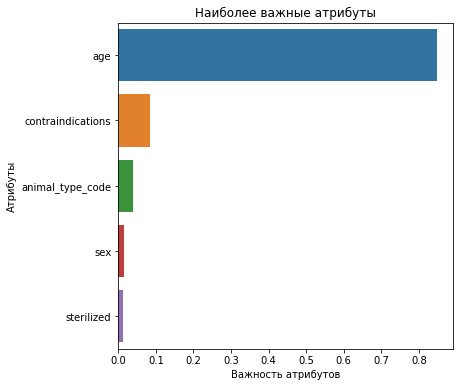

In [50]:
# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# plt.legend()
plt.show()

In [51]:
# Посчитаем качество модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" дала точность предсказания порядка {model.score(x_test, y_test)}.')

              precision    recall  f1-score   support

    Adoption       0.68      0.69      0.68      9818
       Other       0.66      0.65      0.65      6544
    Transfer       0.64      0.62      0.63      7115

    accuracy                           0.66     23477
   macro avg       0.66      0.65      0.65     23477
weighted avg       0.66      0.66      0.66     23477

Модель "рандомных деревьев" дала точность предсказания порядка 0.6578779230736466.
